In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


pd.set_option('display.max_colwidth', None)

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

**Flight delay Information**

In [3]:
file_path = '/content/drive/MyDrive/data_mining/project/data/dictionary.html'
html_data = pd.read_html(file_path)[0]

display(html_data)

/usr/local/lib/python3.11/dist-packages/pandas/io/html.py:661: MarkupResemblesLocatorWarning: The input passed in on this line looks more like a filename than HTML or XML.

If you meant to use Beautiful Soup to parse the contents of a file on disk, then something has gone wrong. You should open the file first, using code like this:

    filehandle = open(your filename)

You can then feed the open filehandle into Beautiful Soup instead of using the filename.

However, if you want to parse some data that happens to look like a filename, then nothing has gone wrong: you are using Beautiful Soup correctly, and this warning is spurious and can be filtered. To make this warning go away, run this code before calling the BeautifulSoup constructor:

    from bs4 import MarkupResemblesLocatorWarning
    import warnings

    warnings.filterwarnings("ignore", category=MarkupResemblesLocatorWarning)
    
  soup = BeautifulSoup(udoc, features="html5lib", from_encoding=from_encoding)


ValueError: No tables found

**Load Flight Data**

In [ ]:
sample_flight_df = pd.read_csv('/content/drive/MyDrive/data_mining/project/data/flights_sample_3m.csv')
print(sample_flight_df.shape)
sample_flight_df.head()

(3000000, 32)


,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,...,DIVERTED,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT
0,2019-01-09,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,1562,FLL,"Fort Lauderdale, FL",EWR,"Newark, NJ",...,0.0,186.0,176.0,153.0,1065.0,NaN,NaN,NaN,NaN,NaN
1,2022-11-19,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,1149,MSP,"Minneapolis, MN",SEA,"Seattle, WA",...,0.0,235.0,236.0,189.0,1399.0,NaN,NaN,NaN,NaN,NaN
2,2022-07-22,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,459,DEN,"Denver, CO",MSP,"Minneapolis, MN",...,0.0,118.0,112.0,87.0,680.0,NaN,NaN,NaN,NaN,NaN
3,2023-03-06,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,2295,MSP,"Minneapolis, MN",SFO,"San Francisco, CA",...,0.0,260.0,285.0,249.0,1589.0,0.0,0.0,24.0,0.0,0.0
4,2020-02-23,Spirit Air Lines,Spirit Air Lines: NK,NK,20416,407,MCO,"Orlando, FL",DFW,"Dallas/Fort Worth, TX",...,0.0,181.0,182.0,153.0,985.0,NaN,NaN,NaN,NaN,NaN


In [1]:
html_data.head()

NameError: name 'html_data' is not defined

**Column Renaming & Summary**

In [ ]:
sample_flight_df.columns = sample_flight_df.columns.str.lower()
round(sample_flight_df.describe(), 2)

,dot_code,fl_number,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,...,diverted,crs_elapsed_time,elapsed_time,air_time,distance,delay_due_carrier,delay_due_weather,delay_due_nas,delay_due_security,delay_due_late_aircraft
count,3000000.00,3000000.00,3000000.00,2922385.00,2922356.00,2921194.00,2921194.00,2920056.00,2920056.00,3000000.00,...,3000000.00,2999986.00,2913802.00,2913802.00,3000000.00,533863.00,533863.00,533863.00,533863.00,533863.00
mean,19976.29,2511.54,1327.06,1329.78,10.12,16.64,1352.36,1462.50,7.68,1490.56,...,0.00,142.28,136.62,112.31,809.36,24.76,3.99,13.16,0.15,25.47
std,377.28,1747.26,485.88,499.31,49.25,9.19,500.87,527.24,6.27,511.55,...,0.05,71.56,71.68,69.75,587.89,71.77,32.41,33.16,3.58,55.77
min,19393.00,1.00,1.00,1.00,-90.00,1.00,1.00,1.00,1.00,1.00,...,0.00,1.00,15.00,8.00,29.00,0.00,0.00,0.00,0.00,0.00
25%,19790.00,1051.00,915.00,916.00,-6.00,11.00,931.00,1049.00,4.00,1107.00,...,0.00,90.00,84.00,61.00,377.00,0.00,0.00,0.00,0.00,0.00
50%,19930.00,2152.00,1320.00,1323.00,-2.00,14.00,1336.00,1501.00,6.00,1516.00,...,0.00,125.00,120.00,95.00,651.00,4.00,0.00,0.00,0.00,0.00
75%,20368.00,3797.00,1730.00,1739.00,6.00,19.00,1752.00,1908.00,9.00,1919.00,...,0.00,172.00,167.00,142.00,1046.00,23.00,0.00,17.00,0.00,30.00
max,20452.00,9562.00,2359.00,2400.00,2966.00,184.00,2400.00,2400.00,249.00,2400.00,...,1.00,705.00,739.00,692.00,5812.00,2934.00,1653.00,1741.00,1185.00,2557.00


**Filter Cancelled and Diverted Flights**

In [ ]:
"""
We remove cancelled and diverted flights because:
1. These flights can introduce noise and bias into the analysis.
2. They often contain missing or inconsistent data (e.g., arrival times, delays).
3. They don't represent normal flight behavior, which is what we're trying to model.
By filtering them out, we ensure cleaner, more reliable data for delay prediction.
"""


print("Cancelled value counts:\n", sample_flight_df['cancelled'].value_counts())
print("Diverted value counts:\n", sample_flight_df['diverted'].value_counts())

# Keep only flights that are not cancelled or diverted
sample_flight_df = sample_flight_df[
    (sample_flight_df['cancelled'] == 0) & (sample_flight_df['diverted'] == 0)
]

print("Shape after filtering:", sample_flight_df.shape)

Cancelled value counts:
 cancelled
0.0    2920860
1.0      79140
Name: count, dtype: int64
Diverted value counts:
 diverted
0.0    2992944
1.0       7056
Name: count, dtype: int64
Shape after filtering: (2913804, 32)


**Define Target Variable - Delay Flag**

In [ ]:
"""
We define a flight as "delayed" if it arrives 15 minutes or more after the scheduled time.
This threshold is based on the U.S. Department of Transportation's standard for reporting flight delays.
Reference: https://www.transtats.bts.gov/OT_Delay/ot_delaycause1.asp
"""

sample_flight_df['flg_delay'] = sample_flight_df['arr_delay'].apply(
    lambda x: 1 if x >= 15 else 0
)

# Check target distribution
sample_flight_df['flg_delay'].value_counts()

,count
flg_delay,
0,2379941
1,533863


**Missing Value Check**

In [ ]:
miss_ser = sample_flight_df.isna().sum()

miss_val = pd.DataFrame({
    'Missing Values': miss_ser.values,
    'Missing %': round((miss_ser / sample_flight_df.shape[0]) * 100, 2).astype(str) + '%',
    'Datatype': sample_flight_df.dtypes
})

miss_val.sort_values(by='Missing %', ascending=False)

,Missing Values,Missing %,Datatype
delay_due_late_aircraft,2379941,81.68%,float64
delay_due_security,2379941,81.68%,float64
delay_due_nas,2379941,81.68%,float64
delay_due_weather,2379941,81.68%,float64
delay_due_carrier,2379941,81.68%,float64
cancellation_code,2913804,100.0%,object
fl_date,0,0.0%,object
crs_arr_time,0,0.0%,int64
distance,0,0.0%,float64
air_time,2,0.0%,float64


**Optimize DataFrame Memory Usage**

In [ ]:
before_size = sample_flight_df.memory_usage(deep=True).sum() / (1024 ** 2)
print(f"DataFrame size before optimization: {before_size:.2f} MB")

def optimize_dataframe(df):
    for col in df.select_dtypes(include=['object']).columns:
        df[col] = df[col].astype('category')


    for col in df.select_dtypes(include=['int64', 'float64']).columns:
        col_min = df[col].min()
        col_max = df[col].max()


        if np.issubdtype(df[col].dtype, np.integer):
            if col_min >= np.iinfo(np.int8).min and col_max <= np.iinfo(np.int8).max:
                df[col] = df[col].astype(np.int8)
            elif col_min >= np.iinfo(np.int16).min and col_max <= np.iinfo(np.int16).max:
                df[col] = df[col].astype(np.int16)
            elif col_min >= np.iinfo(np.int32).min and col_max <= np.iinfo(np.int32).max:
                df[col] = df[col].astype(np.int32)

        elif np.issubdtype(df[col].dtype, np.floating):
            df[col] = df[col].round(2).astype(np.float32)

    return df


sample_flight_df = optimize_dataframe(sample_flight_df)

after_size = sample_flight_df.memory_usage(deep=True).sum() / (1024 ** 2)
print(f"DataFrame size after optimization: {after_size:.2f} MB")

DataFrame size before optimization: 2154.74 MB
DataFrame size after optimization: 297.64 MB


**Drop Irrelevant or Sparse Columns**

In [ ]:
cols_to_drop = [
    'delay_due_late_aircraft', 'delay_due_security', 'delay_due_nas',
    'delay_due_weather', 'delay_due_carrier', 'cancellation_code'
]

sample_flight_df.drop(columns=cols_to_drop, inplace=True)

**Drop Remaining Missing Values (very few)**

In [ ]:
print("Shape before dropping NaNs:", sample_flight_df.shape)
sample_flight_df.dropna(axis=0, how='any', inplace=True)
print("Shape after dropping NaNs:", sample_flight_df.shape)

Shape before dropping NaNs: (2913804, 27)
Shape after dropping NaNs: (2913802, 27)


**Visualizing Outliers with Boxplots**

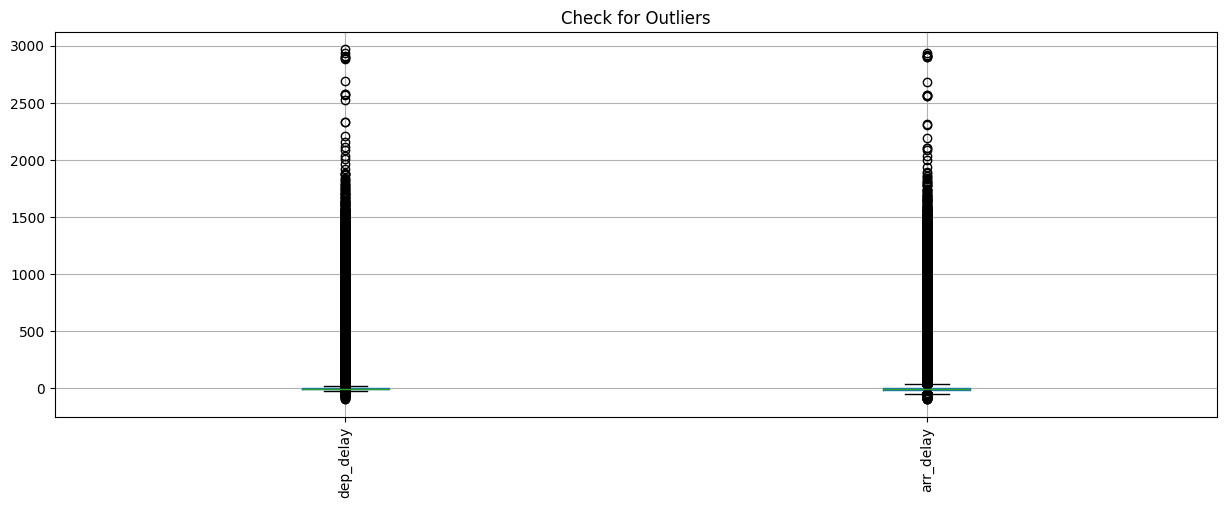

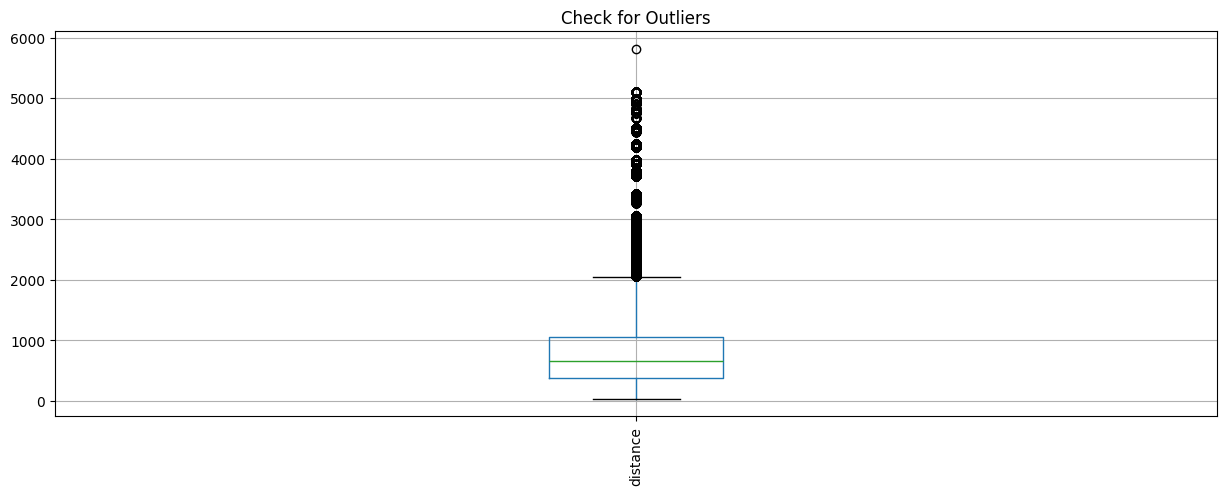

In [ ]:
def plot_boxplots(df, columns):
    plt.figure(figsize=(15, 5))
    df[columns].boxplot()
    plt.xticks(rotation=90)
    plt.title("Check for Outliers")
    plt.show()

# Example usage:
numeric_columns = ['dep_delay', 'arr_delay']
plot_boxplots(sample_flight_df, numeric_columns)

numeric_columns = ['distance']
plot_boxplots(sample_flight_df, numeric_columns)


**Handling Outliers**

In [ ]:
## Cap Outliers

def cap_outliers_and_flag(df, columns, threshold=3):
    df = df.copy()

    for column in columns:
        if column in df.columns:
            mean_val = df[column].mean()
            std_val = df[column].std()
            lower_limit = mean_val - (threshold * std_val)
            upper_limit = mean_val + (threshold * std_val)

            # Cap the values
            df[f'{column}_cap_ol'] = round(np.clip(df[column], lower_limit, upper_limit), 2)

    return df

columns_to_check = ['dep_delay', 'taxi_out', 'arr_delay', 'distance', 'elapsed_time', 'air_time']
sample_flight_df = cap_outliers_and_flag(sample_flight_df, columns_to_check)


In [ ]:
## Log Transformation

# Apply log transformation (add 1 to avoid log(0) issue)
sample_flight_df['dep_delay_log_ol'] = np.log1p(np.where(sample_flight_df['dep_delay'] < 0, 0, sample_flight_df['dep_delay']))
sample_flight_df['taxi_out_log_ol'] = np.log1p(np.where(sample_flight_df['taxi_out'] < 0, 0, sample_flight_df['taxi_out']))
sample_flight_df['arr_delay_log_ol'] = np.log1p(np.where(sample_flight_df['arr_delay'] < 0, 0, sample_flight_df['arr_delay']))
sample_flight_df['distance_log_ol'] = np.log1p(np.where(sample_flight_df['distance'] < 0, 0, sample_flight_df['distance']))
sample_flight_df['elapsed_time_log_ol'] = np.log1p(np.where(sample_flight_df['elapsed_time'] < 0, 0, sample_flight_df['elapsed_time']))
sample_flight_df['air_time_log_ol'] = np.log1p(np.where(sample_flight_df['air_time'] < 0, 0, sample_flight_df['air_time']))


**Visualizing Normal Distribution with Statistics**

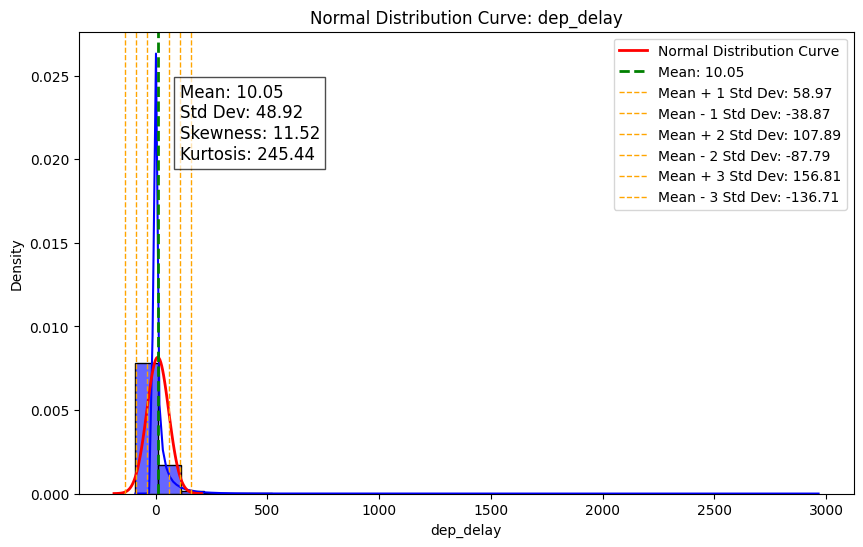

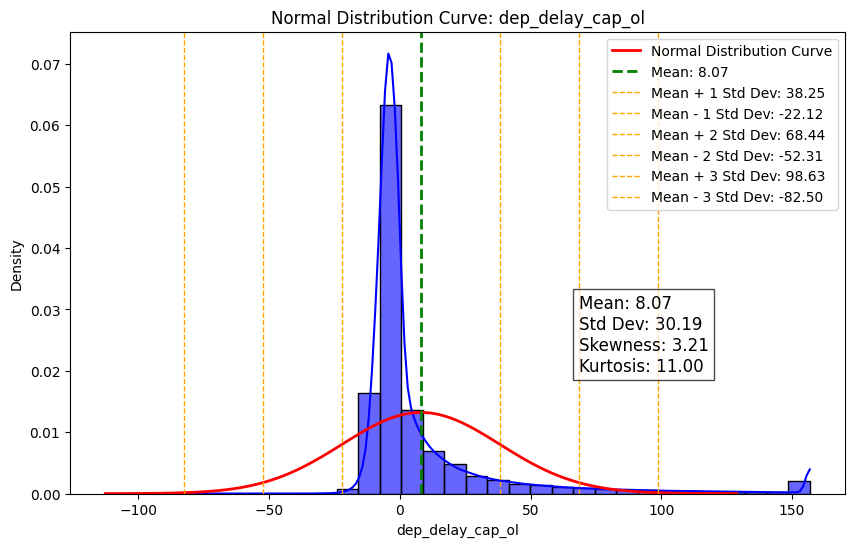

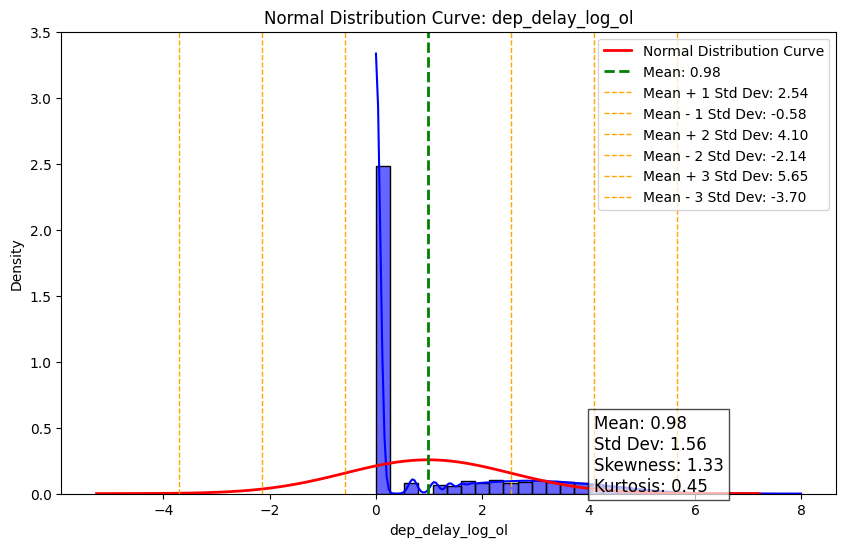

In [ ]:
def plot_normal_distribution_with_stats(df, column):
    mu, sigma = df[column].mean(), df[column].std()
    skewness = df[column].skew()
    kurtosis = df[column].kurtosis()

    # Plot histogram and KDE
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], kde=True, stat="density", bins=30, color='blue', alpha=0.6)

    # Overlay normal distribution curve
    x = np.linspace(mu - 4*sigma, mu + 4*sigma, 100)
    plt.plot(x, stats.norm.pdf(x, mu, sigma), color='red', label='Normal Distribution Curve', linewidth=2)

    # Plot mean and std deviation lines
    plt.axvline(mu, color='green', linestyle='dashed', linewidth=2, label=f'Mean: {mu:.2f}')
    plt.axvline(mu + sigma, color='orange', linestyle='dashed', linewidth=1, label=f'Mean + 1 Std Dev: {mu + sigma:.2f}')
    plt.axvline(mu - sigma, color='orange', linestyle='dashed', linewidth=1, label=f'Mean - 1 Std Dev: {mu - sigma:.2f}')
    plt.axvline(mu + (2*sigma), color='orange', linestyle='dashed', linewidth=1, label=f'Mean + 2 Std Dev: {mu + (2*sigma):.2f}')
    plt.axvline(mu - (2*sigma), color='orange', linestyle='dashed', linewidth=1, label=f'Mean - 2 Std Dev: {mu - (2*sigma):.2f}')
    plt.axvline(mu + (3*sigma), color='orange', linestyle='dashed', linewidth=1, label=f'Mean + 3 Std Dev: {mu + (3*sigma):.2f}')
    plt.axvline(mu - (3*sigma), color='orange', linestyle='dashed', linewidth=1, label=f'Mean - 3 Std Dev: {mu - (3*sigma):.2f}')

    # Title and labels
    plt.title(f"Normal Distribution Curve: {column}")
    plt.xlabel(column)
    plt.ylabel("Density")
    plt.legend()

    # Show statistics
    stats_text = (f"Mean: {mu:.2f}\n"
                  f"Std Dev: {sigma:.2f}\n"
                  f"Skewness: {skewness:.2f}\n"
                  f"Kurtosis: {kurtosis:.2f}")
    plt.text(mu + 2*sigma, 0.02, stats_text, fontsize=12, bbox=dict(facecolor='white', alpha=0.7))

    plt.show()

# Visualize normal distribution for various columns
plot_normal_distribution_with_stats(sample_flight_df, 'dep_delay')
plot_normal_distribution_with_stats(sample_flight_df, 'dep_delay_cap_ol')
plot_normal_distribution_with_stats(sample_flight_df, 'dep_delay_log_ol')

**Handling Time and Date Features**

In [ ]:
# Departure Time
sample_flight_df['crs_dep_time'] = sample_flight_df['crs_dep_time'].astype(str).str.zfill(4)
sample_flight_df['crs_dep_hour'] = pd.to_datetime(sample_flight_df['crs_dep_time'], format='%H%M', errors='coerce').dt.hour

# Arrival Time
sample_flight_df['crs_arr_time'] = sample_flight_df['crs_arr_time'].astype(str).str.zfill(4)
sample_flight_df['crs_arr_hour'] = pd.to_datetime(sample_flight_df['crs_arr_time'], format='%H%M', errors='coerce').dt.hour

# Flight Date
sample_flight_df['fl_date'] = pd.to_datetime(sample_flight_df['fl_date'])

sample_flight_df['fl_mth_id'] = sample_flight_df['fl_date'].dt.year * 100 + sample_flight_df['fl_date'].dt.month
sample_flight_df['fl_year_id'] = sample_flight_df['fl_date'].dt.year
sample_flight_df['fl_mth'] = sample_flight_df['fl_date'].dt.month


Flight Delay % Overall 
18.32 %


Flight Distribution Year Wise 
            No Delay   Delay     %Delay
fl_year_id                             
2019          600843  141253  19.034330
2020          405752   44071   9.797409
2021          496297  103412  17.243697
2022          527293  140468  21.035670
2023          349754  104659  23.031691


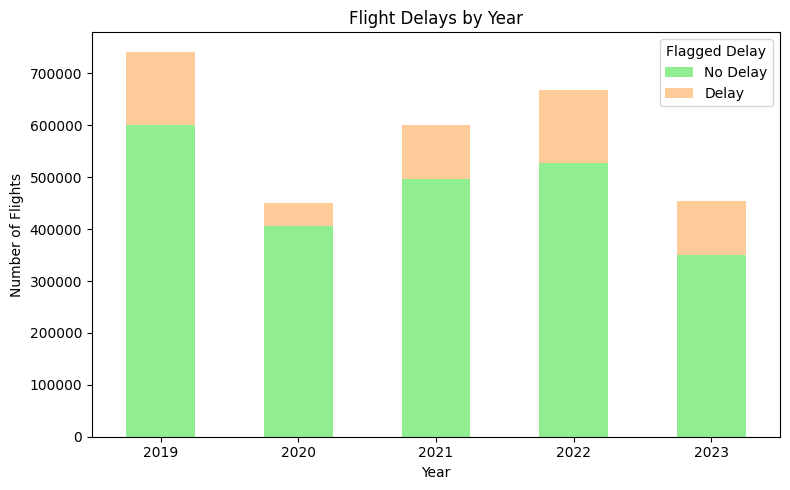

In [ ]:
# Flight Delay Distribution Overview

all_flight_cnt = sample_flight_df['flg_delay'].value_counts()
overall_delay_percentage = round(float(all_flight_cnt[1] / (all_flight_cnt[0] + all_flight_cnt[1]) * 100), 2)
print(f'Flight Delay % Overall \n{overall_delay_percentage} %\n\n')



# Yearly Flight Distribution (Delays and No Delays)
delay_cnt = sample_flight_df.groupby(['fl_year_id', 'flg_delay']).size().unstack(fill_value=0)
delay_cnt['%delay'] = (delay_cnt[1] / (delay_cnt[0] + delay_cnt[1]) * 100)
delay_cnt.columns = ['No Delay', 'Delay', '%Delay']
print(f'Flight Distribution Year Wise \n{delay_cnt}')

ax = delay_cnt[['No Delay', 'Delay']].plot(kind='bar', stacked=True, figsize=(8, 5), color=['#90EE90', '#FFCC99'])

# Adding titles and labels to the plot
plt.title('Flight Delays by Year')
plt.xlabel('Year')
plt.ylabel('Number of Flights')
plt.xticks(rotation=0)
plt.legend(title='Flagged Delay', labels=['No Delay', 'Delay'])
plt.tight_layout()
plt.show()


In [ ]:
# Extract city from origin city
sample_flight_df['city'] = sample_flight_df['origin_city'].map(
    lambda x: x.split(',')[0].split('/')[0]
)


**Aggregating Data for Airport Congestion**

In [ ]:
# Aggregate airport congestion data
a_df = sample_flight_df.groupby(['fl_date', 'origin', 'crs_dep_hour'], observed=True).agg({
    'airline': ['count']
}).reset_index()

a_df = a_df.sort_values(['fl_date', 'origin', 'crs_dep_hour'])
a_df.columns = ['fl_date', 'origin', 'crs_dep_hour', 'no_of_flights']

# Type conversions
a_df['fl_date'] = pd.to_datetime(a_df['fl_date'])
a_df['origin'] = a_df['origin'].astype('category')
a_df['crs_dep_hour'] = a_df['crs_dep_hour'].astype('int8')
a_df['no_of_flights'] = a_df['no_of_flights'].astype('int16')

def calculate_grp_hour(df):
    df = df.sort_values(['fl_date', 'origin', 'crs_dep_hour']).reset_index(drop=True)
    grp_hours = []
    for _, group in df.groupby(['fl_date', 'origin']):
        hours = group['crs_dep_hour'].values
        no_of_flights = group['no_of_flights'].values

        grp_sum = []
        for i, hour in enumerate(hours):
            mask = (hours >= hour - 1) & (hours <= hour + 1)
            grp_sum.append(np.sum(no_of_flights[mask]))

        grp_hours.extend(grp_sum)

    df['conjunction_flight_count'] = grp_hours
    return df

result_df = calculate_grp_hour(a_df)

sample_flight_df = pd.merge(sample_flight_df, result_df, on=['fl_date', 'origin', 'crs_dep_hour'], how='left')

**Data Optimization and Merging Flight Data with Weather Information**

In [ ]:
"""
Use the Weather_Data_Collection.ipynb file to generate the weather data, which is then saved in a CSV file that we are currently utilizing.
"""

weather_df = pd.read_csv('/content/drive/MyDrive/data_mining/project/data/combined_weather_data.csv')
weather_df = optimize_dataframe(weather_df)
weather_df.info()

# Convert 'conditions' and 'icon' columns to categorical data type for better memory management
weather_df['conditions'] = weather_df['conditions'].astype('category')
weather_df['icon'] = weather_df['icon'].astype('category')


weather_df.rename(columns={
    'datetime': 'fl_date'
}, inplace=True)

weather_df['fl_date'] = pd.to_datetime(weather_df['fl_date'])

# Drop unnecessary columns to clean up the dataset
weather_df.drop(columns=['preciptype', 'windgust', 'tzoffset', 'severerisk'], inplace=True)

# Remove rows with missing values
weather_df = weather_df.dropna(how='any', axis=0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568593 entries, 0 to 568592
Data columns (total 42 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   Unnamed: 0      568593 non-null  int16   
 1   datetime        568593 non-null  category
 2   datetimeEpoch   568593 non-null  int32   
 3   tempmax         568593 non-null  float32 
 4   tempmin         568593 non-null  float32 
 5   temp            568593 non-null  float32 
 6   feelslikemax    568593 non-null  float32 
 7   feelslikemin    568593 non-null  float32 
 8   feelslike       568593 non-null  float32 
 9   dew             568593 non-null  float32 
 10  humidity        568593 non-null  float32 
 11  precip          568593 non-null  float32 
 12  precipprob      568593 non-null  float32 
 13  precipcover     568593 non-null  float32 
 14  preciptype      222603 non-null  category
 15  snow            568593 non-null  float32 
 16  snowdepth       568593 non-null  float

In [ ]:
# Merge flight data with weather data on 'city' and 'fl_date' columns
# We are removing those flights, for which we do not have the weather data
flight_df = pd.merge(sample_flight_df, weather_df, on=['city', 'fl_date'], how='inner')
print(flight_df.shape)
flight_df.head()

(2907567, 83)


,fl_date,airline,airline_dot,airline_code,dot_code,fl_number,origin,origin_city,dest,dest_city,...,sunsetEpoch,moonphase,conditions,description,icon,stations,source,start_date,end_date,SourceFile
0,2019-01-09,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,1562,FLL,"Fort Lauderdale, FL",EWR,"Newark, NJ",...,1.547074e+09,0.12,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"['74783012849', 'FDLF1', 'D0271', '72204992805', 'KFLL', '72203912885', 'KFXE', 'KPMP']",obs,2019-01-01,2020-02-05,Fort Lauderdale_2019-01-01_2020-02-05.csv
1,2022-11-19,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,1149,MSP,"Minneapolis, MN",SEA,"Seattle, WA",...,1.668898e+09,0.86,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"['F0824', 'KSTP', '72658414927', 'HPN21', '72657594960', '72658014922', 'KMSP', 'KMIC']",obs,2022-04-18,2023-05-23,Minneapolis_2022-04-18_2023-05-23.csv
2,2022-07-22,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,459,DEN,"Denver, CO",MSP,"Minneapolis, MN",...,1.658543e+09,0.80,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"['KBKF', 'KDEN', '72469523036', 'KAPA', '72565003017', 'C7015', '72466693067']",obs,2022-04-18,2023-05-23,Denver_2022-04-18_2023-05-23.csv
3,2023-03-06,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,2295,MSP,"Minneapolis, MN",SFO,"San Francisco, CA",...,1.678148e+09,0.47,"Snow, Rain, Partially cloudy",Partly cloudy throughout the day with a chance of rain or snow throughout the day.,snow,"['F0824', 'KSTP', 'HPN21', '72658414927', '72657594960', 'KMSP', '72658014922', 'KMIC']",obs,2022-04-18,2023-05-23,Minneapolis_2022-04-18_2023-05-23.csv
4,2020-02-23,Spirit Air Lines,Spirit Air Lines: NK,NK,20416,407,MCO,"Orlando, FL",DFW,"Dallas/Fort Worth, TX",...,1.582500e+09,0.00,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"['72205312841', '72205712854', 'D4166', '72205012815', 'KISM', 'KORL', 'KMCO']",obs,2020-02-06,2021-03-12,Orlando_2020-02-06_2021-03-12.csv


In [ ]:
%who

a_df	 after_size	 all_flight_cnt	 ax	 axes	 before_size	 calculate_grp_hour	 cap_outliers_and_flag	 cols_to_drop	 
columns_to_check	 delay_cnt	 delay_counts	 delay_counts_percentage	 fig	 file_path	 flight_df	 height	 html_data	 
miss_ser	 miss_val	 np	 numeric_columns	 optimize_dataframe	 overall_delay_counts	 overall_delay_percentage	 p	 pd	 
plot_boxplots	 plot_normal_distribution_with_stats	 plt	 result_df	 sample_flight_df	 sns	 stats	 warnings	 weather_df	 
width	 x	 y	 


In [ ]:
## Remove Unnecessary dataframe and fucntion from memory
del sample_flight_df
del weather_df
del all_flight_cnt
del a_df
del after_size
del before_size
del calculate_grp_hour
del cap_outliers_and_flag
del cols_to_drop
del columns_to_check
del delay_cnt
del delay_counts_percentage
del fig
del file_path
del height
del miss_ser
del miss_val
del numeric_columns
del optimize_dataframe
del overall_delay_counts
del plot_boxplots
del plot_normal_distribution_with_stats
del result_df
del x
del y

**WoE Calculation**

In [ ]:
flight_df['target'] = flight_df['flg_delay'].copy()

import numpy as np
import pandas as pd

woe_dict = {}

def calculate_woe_multiple_columns(df, categorical_cols, target_col):
    global woe_dict
    total_positives = df[target_col].sum()
    total_negatives = len(df) - total_positives

    for categorical_col in categorical_cols:
        category_props = df.groupby(categorical_col)[target_col].agg(['sum', 'count'])

        category_props['proportion_positive'] = (category_props['sum'] / total_positives)
        category_props['proportion_negative'] = (category_props['count'] - category_props['sum']) / total_negatives


        category_props['WoE'] = round(np.log(category_props['proportion_positive'] / category_props['proportion_negative']) * 100, 2)
        woe_mapping = category_props['WoE'].to_dict()
        df[f'WoE_{categorical_col}'] = df[categorical_col].map(woe_mapping)
        woe_dict[categorical_col] = woe_mapping
    return df


categorical_columns = ['conditions','icon','airline','origin']
flight_df = calculate_woe_multiple_columns(flight_df, categorical_columns, 'target')


file_path = '/content/drive/MyDrive/data_mining/project/data/woe_dict.txt'
with open(file_path, 'w') as file:
    file.write(str(woe_dict))

**Saving Processed flight Data to CSV**

In [ ]:
"""
    Preprocessing is complete. Now, saving the final processed flight data
    with Weight of Evidence (WoE) values and other transformations to a CSV file
    for further analysis and model building.
"""

flight_df.to_csv('/content/drive/MyDrive/data_mining/project/data/final_flight_weat_df.csv',index=False)
del flight_df

# **Building Predictive Models on Processed Flight Data**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


pd.set_option('display.max_colwidth', None)

In [ ]:
type_dict = {'fl_date': 'category',
 'airline': 'category',
 'airline_dot': 'category',
 'airline_code': 'category',
 'dot_code': 'int16',
 'fl_number': 'int16',
 'origin': 'category',
 'origin_city': 'category',
 'dest': 'category',
 'dest_city': 'category',
 'crs_dep_time': 'int16',
 'dep_time': 'float32',
 'dep_delay': 'float32',
 'taxi_out': 'float32',
 'wheels_off': 'float32',
 'wheels_on': 'float32',
 'taxi_in': 'float32',
 'crs_arr_time': 'int16',
 'arr_time': 'float32',
 'arr_delay': 'float32',
 'cancelled': 'float32',
 'diverted': 'float32',
 'crs_elapsed_time': 'float32',
 'elapsed_time': 'float32',
 'air_time': 'float32',
 'distance': 'float32',
 'flg_delay': 'int8',
 'dep_delay_cap_ol': 'float32',
 'taxi_out_cap_ol': 'float32',
 'arr_delay_cap_ol': 'float32',
 'distance_cap_ol': 'float32',
 'elapsed_time_cap_ol': 'float32',
 'air_time_cap_ol': 'float32',
 'dep_delay_log_ol': 'float32',
 'taxi_out_log_ol': 'float32',
 'arr_delay_log_ol': 'float32',
 'distance_log_ol': 'float32',
 'elapsed_time_log_ol': 'float32',
 'air_time_log_ol': 'float32',
 'crs_dep_hour': 'int8',
 'crs_arr_hour': 'float32',
 'fl_mth_id': 'int32',
 'fl_year_id': 'int16',
 'fl_mth': 'int8',
 'no_of_flights': 'int8',
 'conjunction_flight_count': 'int8',
 'city': 'category',
 'Unnamed: 0': 'int16',
 'datetimeEpoch': 'int32',
 'tempmax': 'float32',
 'tempmin': 'float32',
 'temp': 'float32',
 'feelslikemax': 'float32',
 'feelslikemin': 'float32',
 'feelslike': 'float32',
 'dew': 'float32',
 'humidity': 'float32',
 'precip': 'float32',
 'precipprob': 'float32',
 'precipcover': 'float32',
 'snow': 'float32',
 'snowdepth': 'float32',
 'windspeed': 'float32',
 'winddir': 'float32',
 'pressure': 'float32',
 'cloudcover': 'float32',
 'visibility': 'float32',
 'solarradiation': 'float32',
 'solarenergy': 'float32',
 'uvindex': 'float32',
 'sunrise': 'category',
 'sunriseEpoch': 'float32',
 'sunset': 'category',
 'sunsetEpoch': 'float32',
 'moonphase': 'float32',
 'conditions': 'category',
 'description': 'category',
 'icon': 'category',
 'stations': 'category',
 'source': 'category',
 'start_date': 'category',
 'end_date': 'category',
 'SourceFile': 'category',
 'target': 'int8',
 'WoE_conditions': 'float32',
 'WoE_icon': 'float32',
 'WoE_airline': 'float32',
 'WoE_origin': 'float32'
}

In [ ]:
flight_df = pd.read_csv('/content/drive/MyDrive/data_mining/project/data/final_flight_weat_df.csv', dtype=type_dict)
print(flight_df.shape)
# Drop rows with any missing values
flight_df = flight_df.dropna(how='any', axis=0)
print(flight_df.shape)

(2907567, 88)
(2907554, 88)


**Train-Test Split**

In [ ]:
## Randomly split the data into train (90%) and test (10%) datasets.
import numpy as np
train_df, test_df = np.split(
        flight_df.sample(frac=1, random_state=1212),
        [int(.9*len(flight_df))]
        )

print(len(train_df), len(test_df))

del flight_df

2616798 290756


**Informatino Value (IV)**

In [ ]:
"""
    This function calculates the Information Value (IV) for each feature in the dataset
    based on its relationship with the target variable.
"""

def iv(df, target, bins=10, fill_na=True, rm_cols=[], woe_table=False):
    df = df.copy()
    col_names = df.dtypes.index
    col_names = col_names.delete(df.columns.get_loc(target))

    for col in rm_cols:
        col_names = col_names.delete(df.columns.get_loc(col))

    woe_dfs = {}
    skipped_vars = {}
    iv_df = pd.DataFrame()
    for col in col_names:
        missing_perc = (df[col].isna().sum() / df.shape[0]) * 100
        if missing_perc >= 50:
            skipped_vars[col] = missing_perc

        if df[col].dtype.kind in 'biufc':
            if len(np.unique(df[col])) < bins:
                df['decile'] = df[col]
            else:
                df['decile'] = pd.qcut(df[col].rank(), bins, labels=False, duplicates='drop')


            if fill_na:
                df['decile'] = df['decile'].fillna(value="Missing")


            Rank = df.groupby('decile').apply(lambda x: pd.Series([
                np.min(x[col]), np.max(x[col]), np.mean(x[col]),
                np.sum(x[target]),
                np.size(x[target][x[target] == 0])
            ], index=["Min_Value", "Max_Value", "Mean_Value", "cnt_resp", "cnt_non_resp"])).reset_index()
        else:
            if fill_na:
                if df[col].dtype.name == 'category':
                    df[col] = df[col].cat.add_categories("Missing").fillna("Missing")
                else:
                    df[col] = df[col].fillna("Missing")

            Rank = df.groupby(col).apply(lambda x: pd.Series([
                np.sum(x[target]),
                np.size(x[target][x[target] == 0])
            ], index=["cnt_resp", "cnt_non_resp"])).reset_index()


        Rank["pct_resp"] = Rank["cnt_resp"] / np.sum(Rank["cnt_resp"])
        Rank["pct_non_resp"] = Rank["cnt_non_resp"] / np.sum(Rank["cnt_non_resp"])
        Rank["resp_minus_non_resp"] = Rank["pct_resp"] - Rank["pct_non_resp"]


        np.seterr(divide='ignore')
        Rank["WOE"] = np.where(Rank["pct_resp"] != 0, np.log(Rank["pct_resp"] / Rank["pct_non_resp"]), 0)
        np.seterr(divide='warn')

        Rank["IV"] = Rank["resp_minus_non_resp"] * Rank["WOE"]

        iv_df_1 = pd.DataFrame({'Var': [col], "IV": [Rank["IV"].sum()]})
        iv_df = pd.concat([iv_df, iv_df_1], ignore_index=True)
        del Rank["resp_minus_non_resp"]


        if df[col].dtype.kind in 'biufc':
            Rank["Range"] = Rank['Min_Value'].astype('str') + "-" + Rank['Max_Value'].astype('str')
            Rank = Rank[['Range', 'Mean_Value', 'cnt_resp', 'cnt_non_resp', 'pct_resp', 'pct_non_resp', 'WOE', 'IV']]

        woe_dfs[col] = pd.DataFrame(Rank)

    iv_df = iv_df.sort_values('IV', ascending=False).reset_index(drop=True)

    return (iv_df, skipped_vars, woe_dfs) if woe_table else (iv_df, skipped_vars)



info_val = iv(df=train_df.iloc[:, 1:], target="target")
info_val_df = pd.DataFrame(info_val[0])
info_val_df.to_csv("/content/drive/MyDrive/data_mining/project/data/train_df_iv_file.csv", index=False)

<ipython-input-9-d7af915157ed>:45: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  Rank = df.groupby(col).apply(lambda x: pd.Series([
<ipython-input-9-d7af915157ed>:45: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  Rank = df.groupby(col).apply(lambda x: pd.Series([
<ipython-input-9-d7af915157ed>:45: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and i

## Visualizing Trends: Analyzing Feature Impacts on Flight Delays

In [ ]:
def double_axischart(df, var, tar, fill_na=True, bins=10):
    yaxis_label1 = "# Flight Count"
    yaxis_label2 = "Delay. Rate %"

    if (df[var].dtype.kind in 'biufc'):
        import numpy as np

        # Perform binning
        df['decile'] = pd.qcut(df[var].rank(method='first'), bins, labels=False)
        if fill_na:
            df['decile'] = df['decile'].fillna(value="Missing")

        # Group the data and calculate necessary statistics
        grouped = df.groupby('decile')[var].unique()
        clubbing_decile = {}
        for i, values in grouped.items():
            clubbing_decile.update({val: i for val in values})

        df['decile_a'] = df[var].map(clubbing_decile)
        if df['decile_a'].nunique() != df['decile'].nunique():
            print("Re-Adjusting the bins to -", str(df['decile_a'].nunique()))
            df['decile'] = df['decile_a']

        del df['decile_a']

        ab = df.groupby('decile').apply(lambda x: pd.Series([
            np.min(x[var]),
            np.max(x[var]),
            np.size(x[var]),
            np.sum(x[tar]),
        ], index=["min_val", "max_val", "total", 1])).reset_index()

        # Round min_val and max_val for cleaner X-axis
        ab['min_val'] = ab['min_val'].round(2)
        ab['max_val'] = ab['max_val'].round(2)

        ab[var] = ab['min_val'].astype('str') + "  -  " + ab['max_val'].astype('str')
        res = ab[[var, "total", 1]].copy()
        res.set_index(var, inplace=True)

        del df['decile']
    else:
        ab = df.groupby([var, tar]).size().reset_index()
        res = ab.pivot(index=var, columns=tar, values=0)
        res['total'] = res.sum(axis=1)

        if fill_na:
            if df[var].dtype.name == 'category' and "Nan" not in df[var].cat.categories:
                df[var] = df[var].cat.add_categories(["Nan"])
            df[var] = df[var].fillna("Nan")

        ab = df.groupby([var, tar], observed=False).size().reset_index()
        res = ab.pivot(index=var, columns=tar, values=0)
        res['total'] = res.sum(axis=1)

    res['prob'] = round(res[1] * 100 / res['total'], 2)

    # Plot the double-axis chart
    import matplotlib.pyplot as plt
    plt.figure(figsize=(9, 5))
    plt.rcParams['figure.figsize'] = [11, 6]
    ax = res[['total']].plot(kind='bar',
                             use_index=True, label=yaxis_label1)
    plt.suptitle(f"{var} vs. {yaxis_label2}", fontsize=20)
    plt.xlabel(var, fontsize=18)
    plt.ylabel(yaxis_label1, fontsize=16)
    L = plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
    L.get_texts()[0].set_text(yaxis_label1)

    ax2 = ax.twinx()
    ax2.plot(res['prob'], linestyle='-',
             marker='o', linewidth=2.0,
             color="#ff8400", label=yaxis_label2)

    for i, j in res.prob.items():
        ax2.annotate(str(j) + '%', xy=(i, j))

    plt.ylabel(yaxis_label2, fontsize=16)
    L1 = plt.legend(bbox_to_anchor=(1.04, 0.9), loc="upper left")
    L1.get_texts()[0].set_text(yaxis_label2)

    return plt.show()


In [ ]:
from ipywidgets import widgets, interactive,fixed
#Creating Widget
Variable = widgets.Dropdown(
    options=list(train_df.iloc[:, 0:len(train_df)].columns),
    value='fl_date',
    description='Variable',
)

In [ ]:
# fix the dataframe for the interactive chart
class fixed_copy(fixed):
    def get_interact_value(self):
        return self.value.copy()

In [ ]:
#Plotting
interactive(double_axischart, var=Variable, tar="flg_delay", df = fixed_copy(train_df))

interactive(children=(Dropdown(description='Variable', options=('fl_date', 'airline', 'airline_dot', 'airline_…

**Data Preparation for Model Training and Testing**

In [ ]:
model_var = """target ~ dep_delay + taxi_out + dep_time +
               crs_arr_hour + WoE_icon + WoE_airline + WoE_origin +
               visibility
"""


train_df = train_df[['dep_delay', 'taxi_out', 'dep_time', 'crs_arr_hour',
                     'WoE_icon', 'WoE_airline', 'WoE_origin', 'visibility', 'target']]

test_df = test_df[['dep_delay', 'taxi_out', 'dep_time', 'crs_arr_hour',
                   'WoE_icon', 'WoE_airline', 'WoE_origin', 'visibility', 'target']]


print(f"Training Data Shape: {train_df.shape}")
print(f"Testing Data Shape: {test_df.shape}")
train_df.head()

Training Data Shape: (2616798, 9)
Testing Data Shape: (290756, 9)


,dep_delay,taxi_out,dep_time,crs_arr_hour,WoE_icon,WoE_airline,WoE_origin,visibility,target
1573812,24.0,10.0,927.0,10.0,-25.969999,-28.790001,-2.510000,9.9,0
1474946,-2.0,15.0,1343.0,17.0,-16.750000,-28.790001,-28.250000,9.9,0
2244532,-1.0,6.0,1834.0,21.0,-25.969999,6.380000,10.190000,9.9,0
1917096,-4.0,13.0,906.0,9.0,-25.969999,-27.930000,-33.009998,9.9,0
704260,-6.0,9.0,1814.0,20.0,-25.969999,6.380000,15.880000,9.9,0


**Correlation Matrix Visualization**

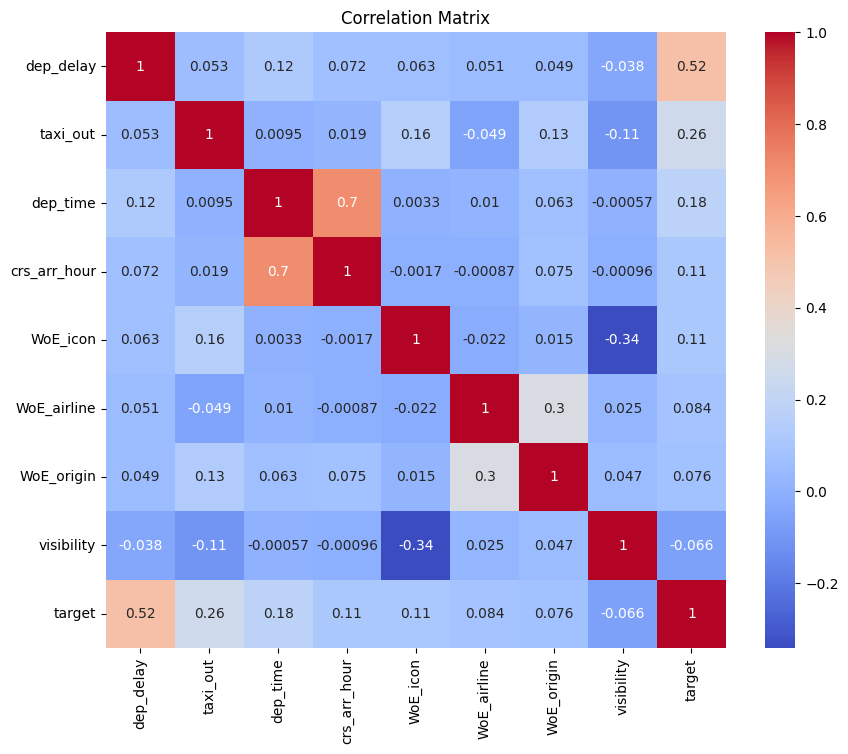

In [ ]:
# Calculate the correlation matrix for numeric features
corr_matrix = train_df.corr(numeric_only=True)


plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

**Variance Inflation Factor (VIF) Calculation**

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import pandas as pd

# Adding a constant to the features for intercept in VIF calculation
X = add_constant(train_df.select_dtypes(include=[float, int]))  # Select only numerical columns

# Calculate VIF for each feature
vif = pd.DataFrame()
vif["Feature"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Print VIF results
print(vif)

        Feature        VIF
0         const  69.217940
1     dep_delay   1.024487
2      taxi_out   1.057938
3      dep_time   2.002432
4  crs_arr_hour   1.989027
5      WoE_icon   1.153905
6   WoE_airline   1.114509
7    WoE_origin   1.140024
8    visibility   1.140721


**Generalized Linear Model (GLM) Logistic Regression**

In [ ]:
import statsmodels.formula.api as sm
import statsmodels.api as sma

model_var = """target ~ dep_delay + taxi_out + dep_time +
               crs_arr_hour + WoE_icon + WoE_airline + WoE_origin +
               visibility
"""

mylogit = sm.glm(
    formula=model_var,
    data=train_df, family=sma.families.Binomial()
).fit()

print(mylogit.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 target   No. Observations:              2616798
Model:                            GLM   Df Residuals:                  2616789
Model Family:                Binomial   Df Model:                            8
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -4.0611e+05
Date:                Fri, 11 Apr 2025   Deviance:                   8.1222e+05
Time:                        19:31:07   Pearson chi2:                 4.20e+08
No. Iterations:                     9   Pseudo R-squ. (CS):             0.4741
Covariance Type:            nonrobust                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -5.9248      0.025   -232.942   

              precision    recall  f1-score   support

           0       0.95      0.98      0.97    237744
           1       0.91      0.79      0.84     53012

    accuracy                           0.95    290756
   macro avg       0.93      0.88      0.90    290756
weighted avg       0.94      0.95      0.94    290756

AUC Score: 0.960867533280606
F1 Score (Test): 0.8413184237906199


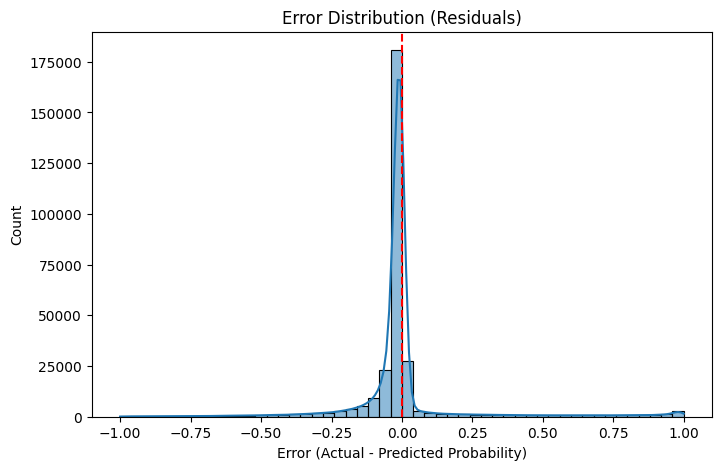

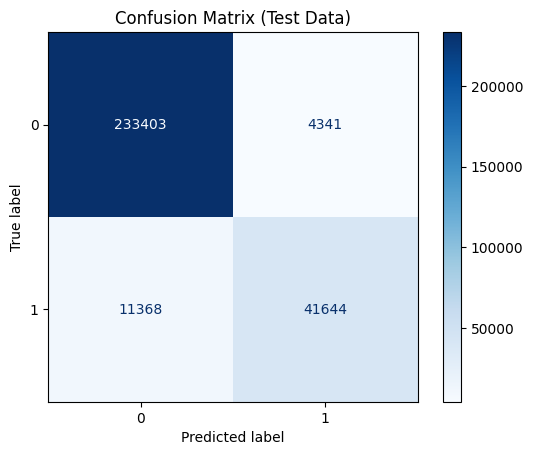

In [ ]:
test_df['pred_prob'] = mylogit.predict(test_df)
test_df['pred_label'] = (test_df['pred_prob'] >= 0.5).astype(int)  # Threshold for classification

test_df = test_df[~test_df['pred_prob'].isna()]

from sklearn.metrics import classification_report, roc_auc_score, f1_score

print(classification_report(test_df['target'], test_df['pred_label']))
print("AUC Score:", roc_auc_score(test_df['target'], test_df['pred_prob']))
print("F1 Score (Test):", f1_score(test_df['target'], test_df['pred_label']))




# Error distribution
test_df['error'] = test_df['target'] - test_df['pred_prob']
plt.figure(figsize=(8, 5))
sns.histplot(test_df['error'], bins=50, kde=True)
plt.title('Error Distribution (Residuals)')
plt.xlabel('Error (Actual - Predicted Probability)')
plt.ylabel('Count')
plt.axvline(0, color='red', linestyle='--')
plt.show()


# Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(test_df['target'], test_df['pred_label'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix (Test Data)')
plt.show()

In [ ]:
# Evaluation - Training Set

train_df = train_df.copy()
train_df.loc[:, 'pred_prob'] = mylogit.predict(train_df)
train_df.loc[:, 'pred_label'] = (train_df['pred_prob'] >= 0.5).astype(int)

from sklearn.metrics import classification_report, roc_auc_score

print(classification_report(train_df['target'], train_df['pred_label']))
print("AUC Score:", roc_auc_score(train_df['target'], train_df['pred_prob']))
print("F1 Score (Train):", f1_score(train_df['target'], train_df['pred_label']))


              precision    recall  f1-score   support

           0       0.95      0.98      0.97   2136817
           1       0.91      0.78      0.84    479981

    accuracy                           0.95   2616798
   macro avg       0.93      0.88      0.90   2616798
weighted avg       0.94      0.95      0.94   2616798

AUC Score: 0.9614093849436611
F1 Score (Train): 0.8415885815119668


**SKLearn Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns


features = ['dep_delay', 'taxi_out', 'dep_time', 'crs_arr_hour',
            'WoE_icon', 'WoE_airline', 'WoE_origin', 'visibility']

X_train = train_df[features]
y_train = train_df['target']

X_test = test_df[features]
y_test = test_df['target']


LG_model = LogisticRegression(random_state=42, max_iter=1000)
LG_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

=== Evaluation on Test Data ===
              precision    recall  f1-score   support

           0       0.95      0.98      0.97    237744
           1       0.91      0.79      0.84     53012

    accuracy                           0.95    290756
   macro avg       0.93      0.88      0.90    290756
weighted avg       0.94      0.95      0.94    290756

AUC Score: 0.9608672780296917
F1 Score: 0.8413354209808577


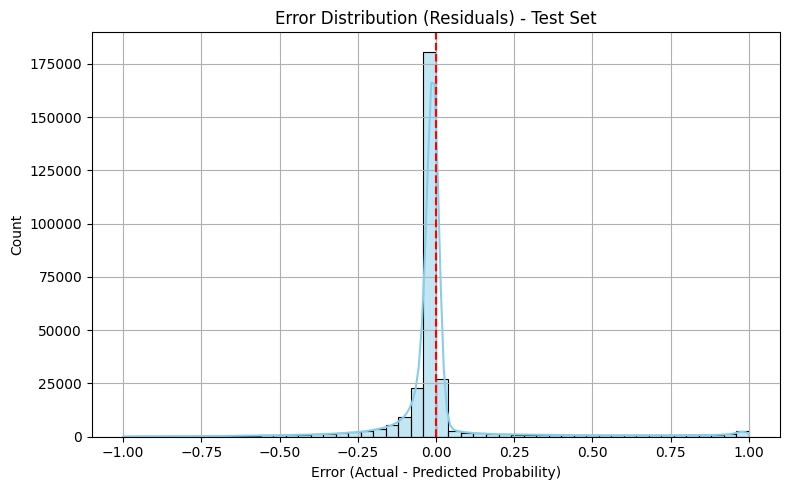

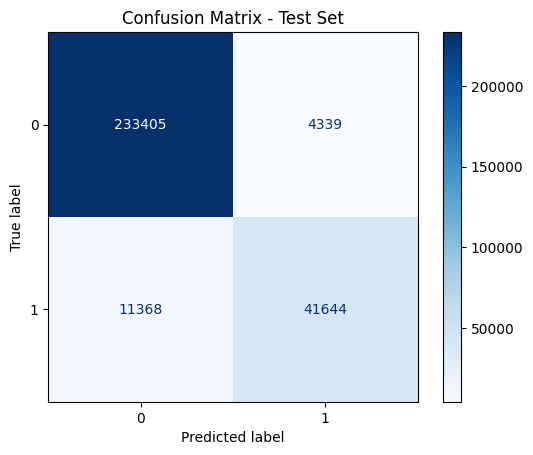

In [ ]:
y_test_pred = LG_model.predict(X_test)
y_test_prob = LG_model.predict_proba(X_test)[:, 1]

print("=== Evaluation on Test Data ===")
print(classification_report(y_test, y_test_pred))
print("AUC Score:", roc_auc_score(y_test, y_test_prob))
print("F1 Score:", f1_score(y_test, y_test_pred))


test_df = test_df.copy()
test_df['pred_prob'] = y_test_prob
test_df['pred_label'] = y_test_pred

# Error distribution
test_df['error'] = test_df['target'] - test_df['pred_prob']
plt.figure(figsize=(8, 5))
sns.histplot(test_df['error'], bins=50, kde=True, color='skyblue')
plt.title('Error Distribution (Residuals) - Test Set')
plt.xlabel('Error (Actual - Predicted Probability)')
plt.ylabel('Count')
plt.axvline(0, color='red', linestyle='--')
plt.grid(True)
plt.tight_layout()
plt.show()


## Confusion Matrix

cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix - Test Set')
plt.show()

In [ ]:
# Training Set Evaluation
y_train_pred = LG_model.predict(X_train)
y_train_prob = LG_model.predict_proba(X_train)[:, 1]

print("\n=== Evaluation on Training Data ===")
print(classification_report(y_train, y_train_pred))
print("AUC Score (Train):", roc_auc_score(y_train, y_train_prob))
print("F1 Score (Train):", f1_score(y_train, y_train_pred))


=== Evaluation on Training Data ===
              precision    recall  f1-score   support

           0       0.95      0.98      0.97   2136817
           1       0.91      0.78      0.84    479981

    accuracy                           0.95   2616798
   macro avg       0.93      0.88      0.90   2616798
weighted avg       0.94      0.95      0.94   2616798

AUC Score (Train): 0.9614092667667204
F1 Score (Train): 0.8415879954388743


**SKLearn Logistic Regression (Balanced)**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns


features = ['dep_delay', 'taxi_out', 'dep_time', 'crs_arr_hour',
            'WoE_icon', 'WoE_airline', 'WoE_origin', 'visibility']

X_train = train_df[features]
y_train = train_df['target']

X_test = test_df[features]
y_test = test_df['target']


LG_B_model = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)
LG_B_model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

=== Evaluation on Test Data ===
              precision    recall  f1-score   support

           0       0.97      0.93      0.95    237744
           1       0.74      0.89      0.81     53012

    accuracy                           0.92    290756
   macro avg       0.86      0.91      0.88    290756
weighted avg       0.93      0.92      0.92    290756

AUC Score: 0.9609682759843736
F1 Score: 0.8061311090346418


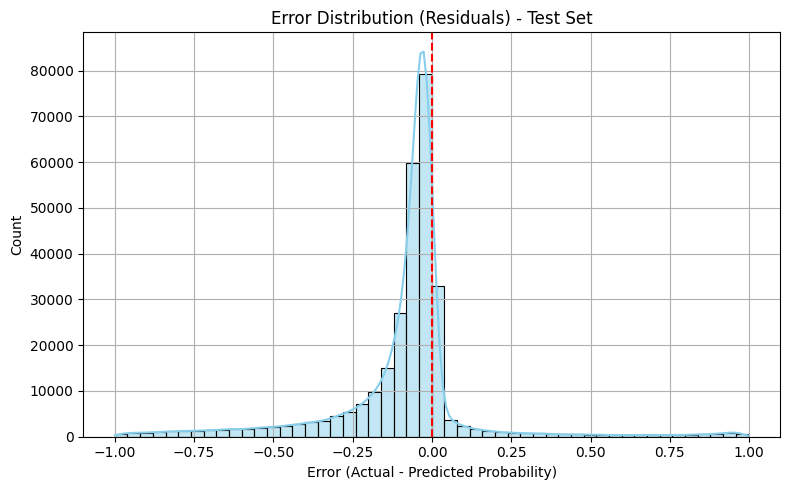

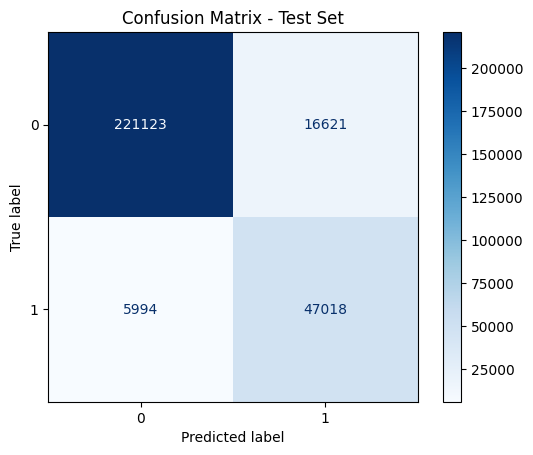

In [ ]:
y_test_pred = LG_B_model.predict(X_test)
y_test_prob = LG_B_model.predict_proba(X_test)[:, 1]

print("=== Evaluation on Test Data ===")
print(classification_report(y_test, y_test_pred))
print("AUC Score:", roc_auc_score(y_test, y_test_prob))
print("F1 Score:", f1_score(y_test, y_test_pred))


test_df = test_df.copy()
test_df['pred_prob'] = y_test_prob
test_df['pred_label'] = y_test_pred

# Error distribution
test_df['error'] = test_df['target'] - test_df['pred_prob']
plt.figure(figsize=(8, 5))
sns.histplot(test_df['error'], bins=50, kde=True, color='skyblue')
plt.title('Error Distribution (Residuals) - Test Set')
plt.xlabel('Error (Actual - Predicted Probability)')
plt.ylabel('Count')
plt.axvline(0, color='red', linestyle='--')
plt.grid(True)
plt.tight_layout()
plt.show()


## Confusion Matrix

cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix - Test Set')
plt.show()

In [ ]:
# Training Set Evaluation
y_train_pred = LG_B_model.predict(X_train)
y_train_prob = LG_B_model.predict_proba(X_train)[:, 1]

print("\n=== Evaluation on Training Data ===")
print(classification_report(y_train, y_train_pred))
print("AUC Score (Train):", roc_auc_score(y_train, y_train_prob))
print("F1 Score (Train):", f1_score(y_train, y_train_pred))


=== Evaluation on Training Data ===
              precision    recall  f1-score   support

           0       0.97      0.93      0.95   2136817
           1       0.74      0.89      0.81    479981

    accuracy                           0.92   2616798
   macro avg       0.86      0.91      0.88   2616798
weighted avg       0.93      0.92      0.93   2616798

AUC Score (Train): 0.9615076837108647
F1 Score (Train): 0.8078173856882321


**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score

features = ['dep_delay', 'taxi_out', 'dep_time', 'crs_arr_hour',
            'WoE_icon', 'WoE_airline', 'WoE_origin', 'visibility']

X_train = train_df[features]
y_train = train_df['target']

X_test = test_df[features]
y_test = test_df['target']

In [ ]:
# Hyperparameter Tuning on a Subset
X_small, _, y_small, _ = train_test_split(
    X_train, y_train, train_size=0.2, stratify=y_train, random_state=42
)

param_grid = {
    'n_estimators': [100, 150],
    'max_depth': [10, 20],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 4],
    'max_features': ['sqrt'],
    'bootstrap': [True]
}

rf = RandomForestClassifier(random_state=42)

search = RandomizedSearchCV(
    rf,
    param_distributions=param_grid,
    n_iter=10,
    cv=3,
    scoring='f1',
    verbose=2,
    n_jobs=-1,
    random_state=42
)

search.fit(X_small, y_small)
print("Best Parameters:\n", search.best_params_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters:
 {'n_estimators': 150, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': True}



=== Evaluation on Test Data ===
              precision    recall  f1-score   support

           0       0.97      0.96      0.96    237744
           1       0.81      0.86      0.84     53012

    accuracy                           0.94    290756
   macro avg       0.89      0.91      0.90    290756
weighted avg       0.94      0.94      0.94    290756

AUC Score: 0.96349010661675
F1 Score: 0.8354124084580625


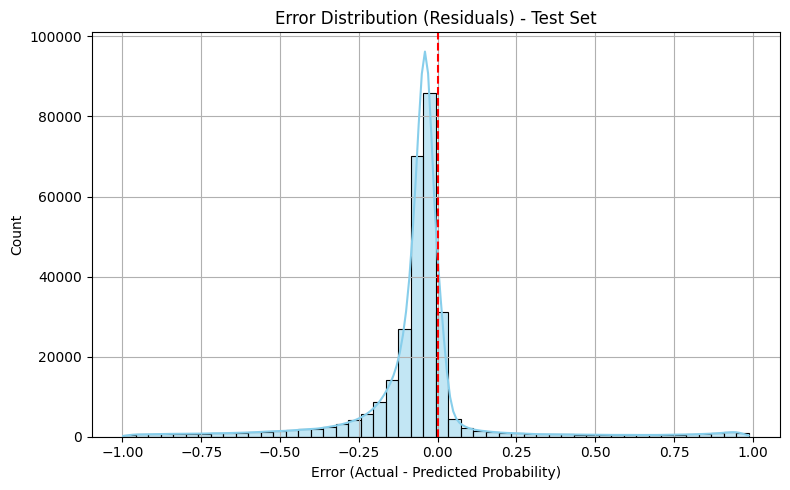

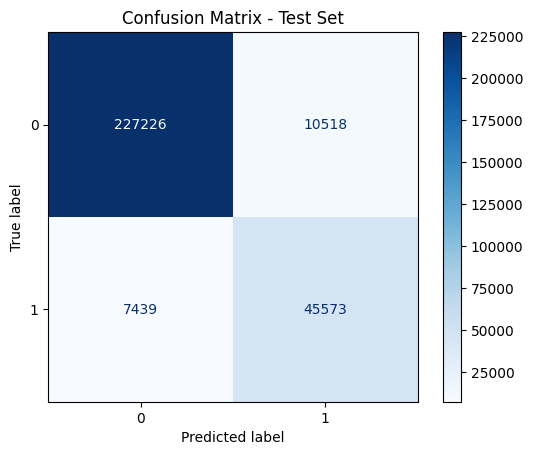

In [ ]:
best_rf = RandomForestClassifier(
    **search.best_params_,
    class_weight='balanced_subsample',
    random_state=42,
    n_jobs=-1
)

best_rf.fit(X_train, y_train)

# Evaluation on Test Set
y_test_pred = best_rf.predict(X_test)
y_test_prob = best_rf.predict_proba(X_test)[:, 1]

print("\n=== Evaluation on Test Data ===")
print(classification_report(y_test, y_test_pred))
print("AUC Score:", roc_auc_score(y_test, y_test_prob))
print("F1 Score:", f1_score(y_test, y_test_pred))

# Assign predictions to test_df
test_df = test_df.copy()
test_df['pred_prob'] = y_test_prob
test_df['pred_label'] = y_test_pred
test_df['error'] = test_df['target'] - test_df['pred_prob']

# Error Distribution Plot
plt.figure(figsize=(8, 5))
sns.histplot(test_df['error'], bins=50, kde=True, color='skyblue')
plt.title('Error Distribution (Residuals) - Test Set')
plt.xlabel('Error (Actual - Predicted Probability)')
plt.ylabel('Count')
plt.axvline(0, color='red', linestyle='--')
plt.grid(True)
plt.tight_layout()
plt.show()

# Confusion Matrix - Test Set
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix - Test Set')
plt.show()

In [ ]:
# Evaluation on Training Set
y_train_pred = best_rf.predict(X_train)
y_train_prob = best_rf.predict_proba(X_train)[:, 1]

print("\n=== Evaluation on Training Data ===")
print(classification_report(y_train, y_train_pred))
print("AUC Score:", roc_auc_score(y_train, y_train_prob))
print("F1 Score:", f1_score(y_train, y_train_pred))


=== Evaluation on Training Data ===
              precision    recall  f1-score   support

           0       0.98      0.96      0.97   2136817
           1       0.85      0.90      0.87    479981

    accuracy                           0.95   2616798
   macro avg       0.91      0.93      0.92   2616798
weighted avg       0.95      0.95      0.95   2616798

AUC Score: 0.984284309741791
F1 Score: 0.873412300830613


**XGBoost Classifier**

In [ ]:
import xgboost as xgb

features = ['dep_delay', 'taxi_out', 'dep_time', 'crs_arr_hour',
            'WoE_icon', 'WoE_airline', 'WoE_origin', 'visibility']

X_train = train_df[features]
y_train = train_df['target']

X_test = test_df[features]
y_test = test_df['target']


# Class Imbalance Handling

neg, pos = np.bincount(y_train)
scale_pos_weight = neg / pos
print(f"Scale Pos Weight: {scale_pos_weight:.2f}")

Scale Pos Weight: 4.45


In [ ]:
2# Hyperparameter Tuning using RandomizedSearchCV

X_small, _, y_small, _ = train_test_split(X_train, y_train, train_size=0.2, stratify=y_train, random_state=42)


xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    scale_pos_weight=scale_pos_weight,
    random_state=42,
    n_jobs=-1
)


param_grid = {
    'n_estimators': [100, 150],
    'max_depth': [4, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1],
    'min_child_weight': [1, 3, 5]
}


search = RandomizedSearchCV(
    xgb_model,
    param_distributions=param_grid,
    n_iter=10,
    cv=3,
    scoring='f1',
    verbose=2,
    n_jobs=-1,
    random_state=42
)

search.fit(X_small, y_small)
best_xgb = search.best_estimator_
print("Best Parameters:", search.best_params_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:08:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters: {'subsample': 1, 'n_estimators': 100, 'min_child_weight': 1, 'max_depth': 10, 'learning_rate': 0.2, 'colsample_bytree': 1}


In [ ]:
# Final XGBoost Model using Best Hyperparameters

best_xgb = xgb.XGBClassifier(
    n_estimators=100,
    max_depth=10,
    learning_rate=0.2,
    subsample=1,
    min_child_weight=1,
    colsample_bytree=1,
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    scale_pos_weight=scale_pos_weight,
    random_state=42,
    n_jobs=-1
)

# Train the final XGBoost model
best_xgb.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:09:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=-1,
              num_parallel_tree=None, random_state=42, ...)


=== Test Set Evaluation ===
              precision    recall  f1-score   support

           0       0.97      0.94      0.96    237744
           1       0.77      0.88      0.82     53012

    accuracy                           0.93    290756
   macro avg       0.87      0.91      0.89    290756
weighted avg       0.94      0.93      0.93    290756

AUC Score: 0.9648960194086315
F1 Score: 0.8230696790206036


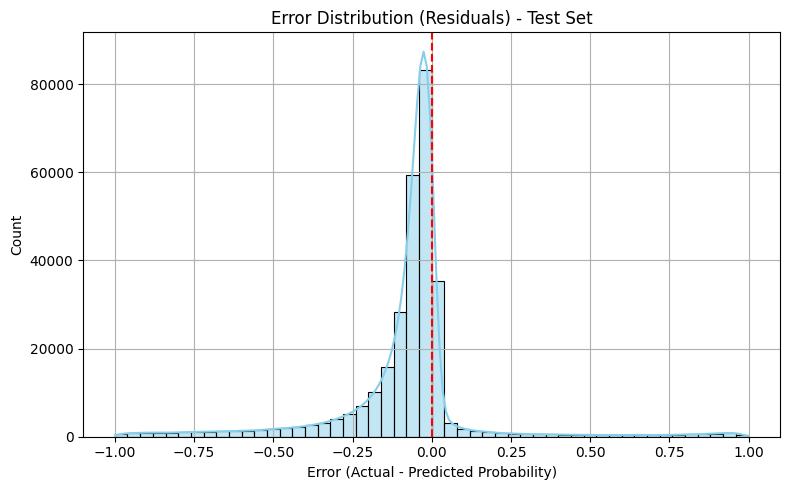

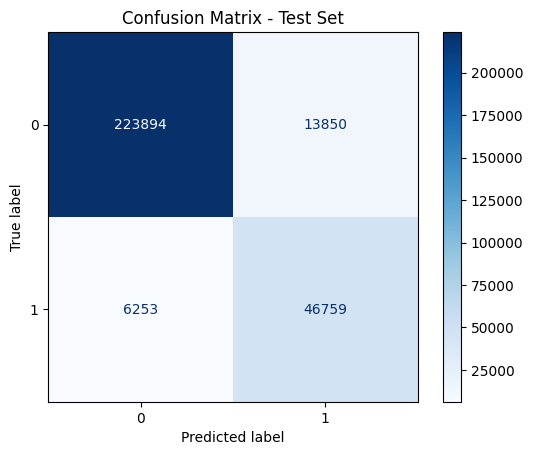

In [ ]:
# Evaluation on Test Set

xgb_pred = best_xgb.predict(X_test)
xgb_prob = best_xgb.predict_proba(X_test)[:, 1]

print("\n=== Test Set Evaluation ===")
print(classification_report(y_test, xgb_pred))
print("AUC Score:", roc_auc_score(y_test, xgb_prob))
print("F1 Score:", f1_score(y_test, xgb_pred))



test_df['pred_prob'] = xgb_prob
test_df['pred_label'] = xgb_pred
test_df['error'] = test_df['target'] - test_df['pred_prob']


# Error Distribution
plt.figure(figsize=(8, 5))
sns.histplot(test_df['error'], bins=50, kde=True, color='skyblue')
plt.title('Error Distribution (Residuals) - Test Set')
plt.xlabel('Error (Actual - Predicted Probability)')
plt.ylabel('Count')
plt.axvline(0, color='red', linestyle='--')
plt.grid(True)
plt.tight_layout()
plt.show()


# Confusion Matrix - Test Set

cm = confusion_matrix(y_test, xgb_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix - Test Set')
plt.show()

In [ ]:
# Evaluation on Training Set
y_train_pred = best_xgb.predict(X_train)
y_train_prob = best_xgb.predict_proba(X_train)[:, 1]

print("\n=== Training Set Evaluation ===")
print(classification_report(y_train, y_train_pred))
print("AUC Score:", roc_auc_score(y_train, y_train_prob))
print("F1 Score:", f1_score(y_train, y_train_pred))


=== Training Set Evaluation ===
              precision    recall  f1-score   support

           0       0.98      0.94      0.96   2136817
           1       0.78      0.89      0.84    479981

    accuracy                           0.94   2616798
   macro avg       0.88      0.92      0.90   2616798
weighted avg       0.94      0.94      0.94   2616798

AUC Score: 0.972827617973711
F1 Score: 0.8351414774991014


## Model Comparison: AUC and F1 Score Evaluation

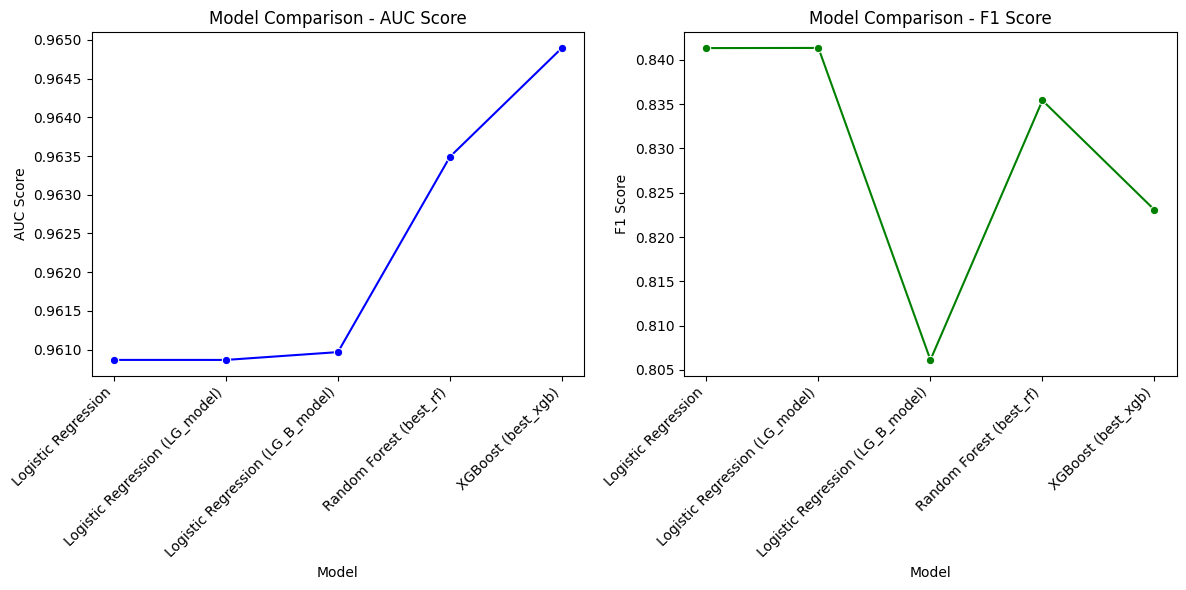

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score, f1_score

# Define models
models = {
    "Generalized Linear Model Regression": mylogit,
    "Logistic Regression (LG_model)": LG_model,
    "Logistic Regression (LG_B_model)": LG_B_model,
    "Random Forest (best_rf)": best_rf,
    "XGBoost (best_xgb)": best_xgb
}

# Initialize results dictionary
results = {
    "Model": [],
    "AUC Score": [],
    "F1 Score": []
}

# Evaluate each model
for model_name, model in models.items():
    # For GLM (mylogit), use .predict() for probabilities
    if model_name == "Logistic Regression":
        y_prob = model.predict(X_test)
    else:
        y_prob = model.predict_proba(X_test)[:, 1]

    y_pred = (y_prob >= 0.5).astype(int)

    # Get AUC and F1 Score
    auc_score = roc_auc_score(y_test, y_prob)
    f1 = f1_score(y_test, y_pred)

    # Append results
    results["Model"].append(model_name)
    results["AUC Score"].append(auc_score)
    results["F1 Score"].append(f1)

# Convert results to DataFrame for easier handling
results_df = pd.DataFrame(results)

# Set the figure size for the plots
plt.figure(figsize=(12, 6))

# Plot AUC Scores as a line graph
plt.subplot(1, 2, 1)
sns.lineplot(x="Model", y="AUC Score", data=results_df, marker='o', color='blue')
plt.title('Model Comparison - AUC Score')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Model')
plt.ylabel('AUC Score')

# Plot F1 Scores as a line graph
plt.subplot(1, 2, 2)
sns.lineplot(x="Model", y="F1 Score", data=results_df, marker='o', color='green')
plt.title('Model Comparison - F1 Score')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Model')
plt.ylabel('F1 Score')


plt.tight_layout()
plt.show()


In [ ]:
"""
Unbalanced Data: The model performs well on class 0 and gets a higher F1 score due to higher precision and recall for class 0, with the recall for class 1 still being acceptable.

Balanced Data: The model's precision for both classes tends to drop as it is forced to handle both classes equally, which lowers the overall F1 score. However, recall for class 1
               improves as the model becomes more sensitive to the minority class.

In conclusion, the F1 score is likely lower on the balanced dataset because of a trade-off between precision and recall. The model might be correctly identifying more
            class 1 samples (improving recall), but it may be doing so at the cost of precision, leading to a lower overall F1 score.
"""